In [ ]:
import keras
#from keras.datasets import mnist #import Data
from sklearn.model_selection import train_test_split
from keras.models import Sequential #preparing layres position
from keras.layers import Dense, Dropout, Flatten, Activation  #3 layers
from keras.layers import Conv2D,MaxPooling2D,GRU,Conv1D,MaxPooling1D #convolution & pooling
from tensorflow.keras import utils as np_utils
import numpy as np
np.set_printoptions(threshold=1000,suppress=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #graph 2D
import warnings
warnings.filterwarnings('ignore')

#Preprocessing

In [ ]:
epilepsie_data=pd.read_csv('data.csv',sep=',',header=0)
epilepsie_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
epilepsie_data.shape

(11500, 180)

In [ ]:
features_names=list(epilepsie_data.columns)
features_names

In [ ]:
epilepsie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
epilepsie_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
             ..
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int64

In [ ]:
epilepsie_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [ ]:
epilepsie_data['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [ ]:
epilepsie_data['y'].value_counts(normalize=True)

5    0.2
4    0.2
3    0.2
2    0.2
1    0.2
Name: y, dtype: float64

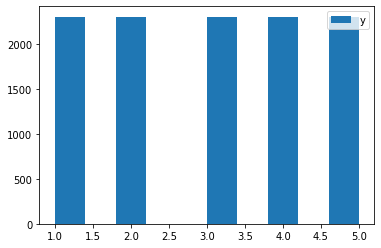

In [ ]:
plt.hist(epilepsie_data['y'],label='y')
plt.legend()

#epilepsie courbes

In [ ]:
epilepsie_data=epilepsie_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
epilepsie_data.shape

(11500, 179)

In [ ]:
ep1=epilepsie_data[epilepsie_data.y==1]
ep2=epilepsie_data[epilepsie_data.y==2]
ep3=epilepsie_data[epilepsie_data.y==3]
ep4=epilepsie_data[epilepsie_data.y==4]
ep5=epilepsie_data[epilepsie_data.y==5]

In [ ]:
a=ep1.iloc[1]
b=ep2.iloc[1]
c=ep3.iloc[1]
d=ep4.iloc[1]
e=ep5.iloc[1]


In [ ]:
a

X1     -278
X2     -246
X3     -215
X4     -191
X5     -177
       ... 
X175   -174
X176   -125
X177    -79
X178    -40
y         1
Name: 8, Length: 179, dtype: int64

<function matplotlib.pyplot.show>

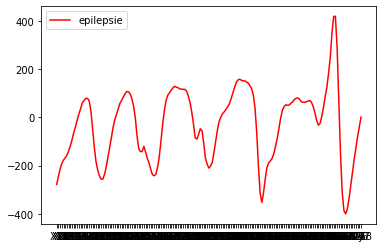

In [ ]:
plt.plot(a,color='red')
plt.tight_layout
plt.gca()
plt.legend(['epilepsie'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

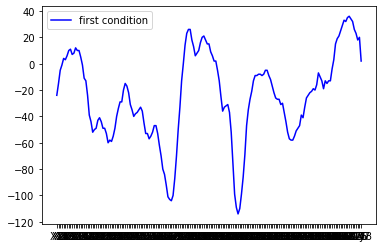

In [ ]:
plt.plot(b,color='blue')
plt.tight_layout
plt.gca()
plt.legend(['first condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

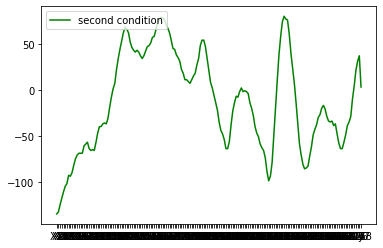

In [ ]:
plt.plot(c,color='green')
plt.tight_layout
plt.gca()
plt.legend(['second condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

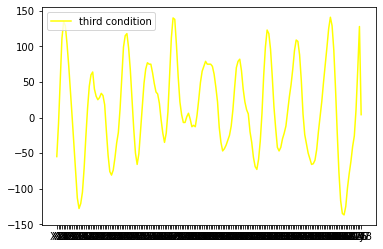

In [ ]:
plt.plot(d,color='yellow')
plt.tight_layout
plt.gca()
plt.legend(['third condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

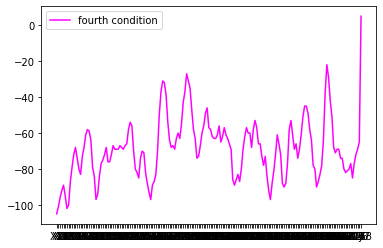

In [ ]:
plt.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.legend(['fourth condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

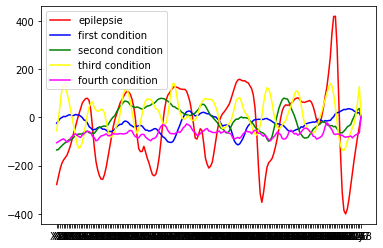

In [ ]:
plt.plot(a,color='red')
plt.plot(b,color='blue')
plt.plot(c,color='green')
plt.plot(d,color='yellow')
plt.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.legend(['epilepsie','first condition','second condition','third condition','fourth condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

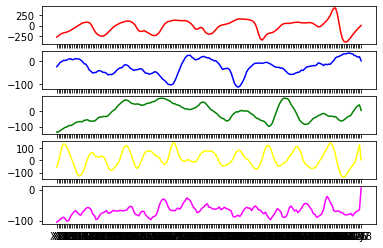

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
ax1.plot(a,color='red')
ax2.plot(b,color='blue')
ax3.plot(c,color='green')
ax4.plot(d,color='yellow')
ax5.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.show

#training

In [ ]:
X=epilepsie_data.iloc[:,0:178]
Y=epilepsie_data['y']
X=X.values
Y=Y.values

In [ ]:
Y

array([4, 1, 5, ..., 5, 3, 4])

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=1)

In [ ]:
Xtrain.shape

(10350, 178)

In [ ]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1).astype('float32')
Xtest=Xtest.reshape(Xtest.shape[0],Xtrain.shape[1],1).astype('float32')
input_shape=(Xtrain.shape[1],1)

In [ ]:
Xtrain /=255.0
Xtest /=255.0

In [ ]:
Ytrain.shape

(10350,)

In [ ]:
Ytrain_one_hot = np_utils.to_categorical(Ytrain)
Ytest_one_hot = np_utils.to_categorical(Ytest)

#CNN Model

In [ ]:
model = Sequential()
model.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(MaxPooling1D(pool_size=2,strides=2))

model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(Conv1D(512,kernel_size=3,activation='relu'))
model.add(Conv1D(1024,kernel_size=3,activation='relu'))

model.add(Flatten())
x = model.output
x=Dense(256,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(256,activation='relu')(x)
#x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
#x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)

prediction_layer = Dense(Ytrain_one_hot.shape[1], activation = 'softmax')(x)

In [ ]:
from keras.models import Model

In [ ]:
cnn_model = Model(inputs=model.input,outputs=prediction_layer)

In [ ]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_input (InputLayer)    [(None, 178, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 88, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 86, 128)           24704     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 84, 512)           197120    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 82, 1024)          1573888   
_________________________________________________________________
flatten (Flatten)            (None, 83968)             0     

In [ ]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history = cnn_model.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 52s 740ms/step - loss: 1.6978 - accuracy: 0.2055 - val_loss: 1.5122 - val_accuracy: 0.2426
Epoch 2/50
8/8 [==============================] - 3s 348ms/step - loss: 1.4680 - accuracy: 0.2876 - val_loss: 1.3031 - val_accuracy: 0.3843
Epoch 3/50
8/8 [==============================] - 3s 350ms/step - loss: 1.2607 - accuracy: 0.4091 - val_loss: 1.1544 - val_accuracy: 0.4443
Epoch 4/50
8/8 [==============================] - 3s 350ms/step - loss: 1.1673 - accuracy: 0.4347 - val_loss: 1.0960 - val_accuracy: 0.4461
Epoch 5/50
8/8 [==============================] - 3s 351ms/step - loss: 1.0964 - accuracy: 0.4673 - val_loss: 1.0444 - val_accuracy: 0.4765
Epoch 6/50
8/8 [==============================] - 3s 354ms/step - loss: 1.0031 - accuracy: 0.5425 - val_loss: 0.8659 - val_accuracy: 0.6061
Epoch 7/50
8/8 [==============================] - 3s 355ms/step - loss: 0.8755 - accuracy: 0.6088 - val_loss: 0.8079 - val_accuracy: 0.6496
Epoch 8/50
8/8 [===

In [ ]:
score = cnn_model.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.03722545504570007
accuracy =  0.990241527557373


In [ ]:
score = cnn_model.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.9360040426254272
accuracy =  0.7799999713897705


{'loss': [1.6372325420379639, 1.442889928817749, 1.2276533842086792, 1.1543673276901245, 1.0898562669754028, 0.9821904301643372, 0.8701655864715576, 0.8423497080802917, 0.7838202714920044, 0.7501137852668762, 0.7001420855522156, 0.6772566437721252, 0.6443241834640503, 0.6275506019592285, 0.6097805500030518, 0.5927028059959412, 0.5612557530403137, 0.5408840775489807, 0.5288870334625244, 0.5352251529693604, 0.4996238052845001, 0.4852984547615051, 0.4713105261325836, 0.4635380804538727, 0.442868173122406, 0.41972798109054565, 0.39880603551864624, 0.3764794170856476, 0.371965616941452, 0.3671131730079651, 0.3312860131263733, 0.3043529689311981, 0.279487282037735, 0.2651140093803406, 0.24789902567863464, 0.2530571222305298, 0.22574138641357422, 0.1965179592370987, 0.186724454164505, 0.16231192648410797, 0.16537822782993317, 0.157863050699234, 0.15275394916534424, 0.13373936712741852, 0.14166568219661713, 0.12522755563259125, 0.10983233153820038, 0.09537149220705032, 0.09162032604217529, 0.1

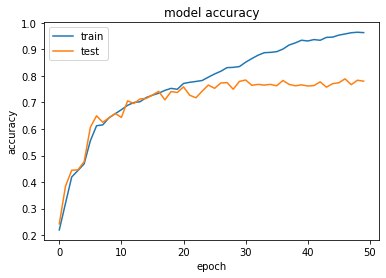

In [ ]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#plt.legend(['test'],loc='upper left')
plt.show()

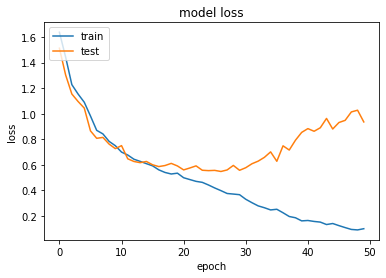

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = cnn_model.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(Ytest, y_pred)

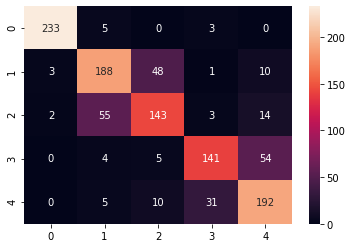

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

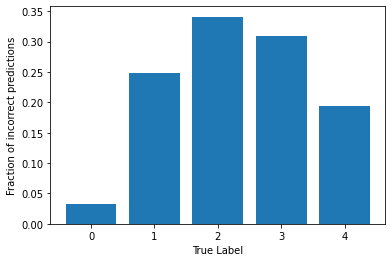

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)
#print(classification_report(Ytrain_one_hot,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       241
           2       0.73      0.75      0.74       250
           3       0.69      0.66      0.68       217
           4       0.79      0.69      0.74       204
           5       0.71      0.81      0.76       238

    accuracy                           0.78      1150
   macro avg       0.78      0.78      0.78      1150
weighted avg       0.78      0.78      0.78      1150



#CNN_LSTM_Model

In [ ]:
from keras.layers import LSTM

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(64,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(64,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 86, 128)           24704     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 84, 512)           197120    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 82, 1024)          1573888   
_________________________________________________________________
dense_5 (Dense)              (None, 82, 256)           262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 82, 256)          

In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 11s 536ms/step - loss: 1.7344 - accuracy: 0.2105 - val_loss: 1.5144 - val_accuracy: 0.2504
Epoch 2/50
8/8 [==============================] - 3s 406ms/step - loss: 1.4706 - accuracy: 0.3339 - val_loss: 1.2980 - val_accuracy: 0.4357
Epoch 3/50
8/8 [==============================] - 3s 406ms/step - loss: 1.2662 - accuracy: 0.4385 - val_loss: 1.2744 - val_accuracy: 0.3974
Epoch 4/50
8/8 [==============================] - 3s 405ms/step - loss: 1.1974 - accuracy: 0.4546 - val_loss: 1.0933 - val_accuracy: 0.4983
Epoch 5/50
8/8 [==============================] - 3s 408ms/step - loss: 1.0173 - accuracy: 0.5439 - val_loss: 1.0351 - val_accuracy: 0.5296
Epoch 7/50
8/8 [==============================] - 3s 409ms/step - loss: 0.9972 - accuracy: 0.5537 - val_loss: 1.0326 - val_accuracy: 0.5287
Epoch 8/50
8/8 [==============================] - 3s 411ms/step - loss: 0.9625 - accuracy: 0.5806 - val_loss: 0.9054 - val_accuracy: 0.6017
Epoch 9/50
8/8 [===

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.49550455808639526
accuracy =  0.7718840837478638


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5290066003799438
accuracy =  0.760869562625885


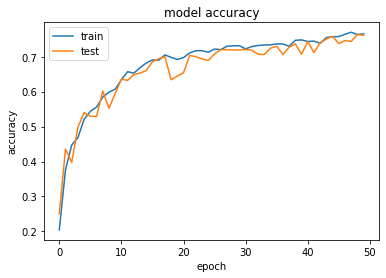

In [ ]:
#print(history_LSTM.history)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#plt.legend(['test'],loc='upper left')
plt.show()

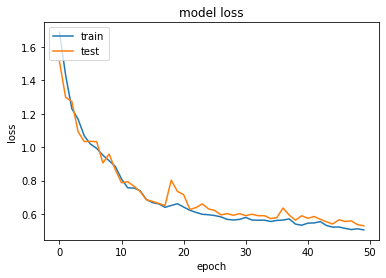

In [ ]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = model_LSTM.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
cm = confusion_matrix(Ytest, y_pred)
print(cm)

[[234   5   1   1   0]
 [  3 145  91   1  10]
 [  2  50 151   3  11]
 [  0   4   3 147  50]
 [  0   7  11  22 198]]


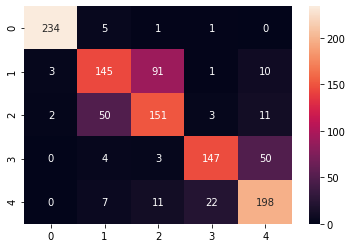

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

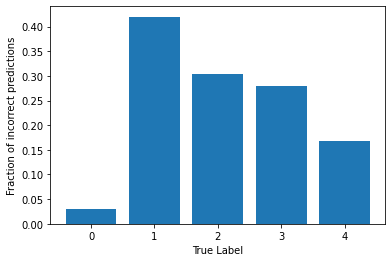

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       241
           2       0.69      0.58      0.63       250
           3       0.59      0.70      0.64       217
           4       0.84      0.72      0.78       204
           5       0.74      0.83      0.78       238

    accuracy                           0.76      1150
   macro avg       0.77      0.76      0.76      1150
weighted avg       0.77      0.76      0.76      1150



#CNN & CNN_LSTM Courbe

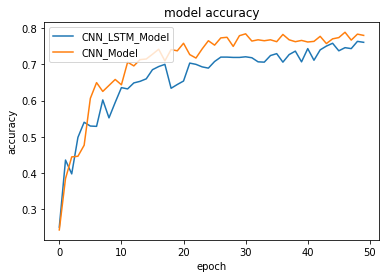

In [ ]:
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

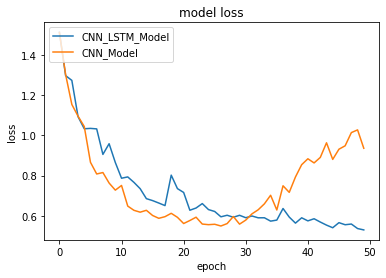

In [ ]:
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

#CNN_SVM

In [ ]:
X_for_SVM = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_model = SVC(gamma='auto',C=150,kernel='linear')

In [ ]:
SVM_model.fit(X_for_SVM,Ytrain)

SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_SVM = SVM_model.predict(X_test_features)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_SVM))

Accuracy =  0.7860869565217391


In [ ]:
cm = confusion_matrix(Ytest, prediction_SVM)
print(cm)

[[234   5   0   2   0]
 [  5 186  48   1  10]
 [  3  55 142   5  12]
 [  0   4   3 157  40]
 [  0   5   7  41 185]]


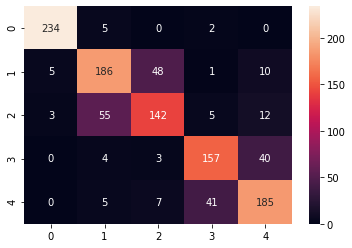

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

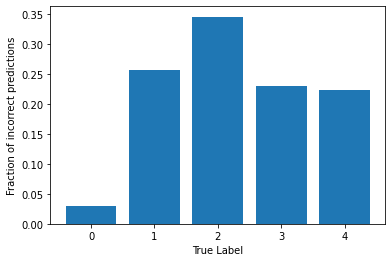

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,prediction_SVM)
print(cp)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       241
           2       0.73      0.74      0.74       250
           3       0.71      0.65      0.68       217
           4       0.76      0.77      0.77       204
           5       0.75      0.78      0.76       238

    accuracy                           0.79      1150
   macro avg       0.78      0.78      0.78      1150
weighted avg       0.79      0.79      0.79      1150



#CNN_RF

In [ ]:
X_For_RF = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=42)

In [ ]:
RF_model.fit(X_For_RF,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_RF = RF_model.predict(X_test_features)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_RF))

Accuracy =  0.7913043478260869


In [ ]:
cm = confusion_matrix(Ytest, prediction_RF)

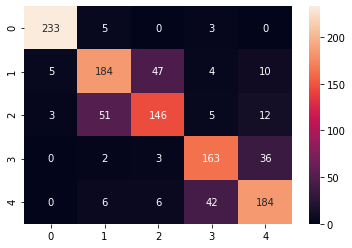

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

Text(0, 0.5, 'Fraction of incorrect predictions')

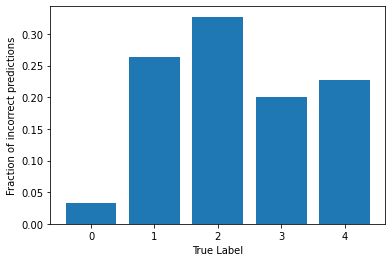

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
cp = classification_report(Ytest,prediction_RF)
print(cp)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       241
           2       0.74      0.74      0.74       250
           3       0.72      0.67      0.70       217
           4       0.75      0.80      0.77       204
           5       0.76      0.77      0.77       238

    accuracy                           0.79      1150
   macro avg       0.79      0.79      0.79      1150
weighted avg       0.79      0.79      0.79      1150



#Bar chart

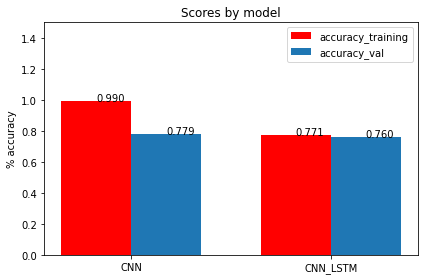

In [ ]:
labels = ['CNN', 'CNN_LSTM']
accuracy_training = [0.990,0.771]
accuracy_val = [0.779, 0.760]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_training, width, label='accuracy_training',color='red')
rects2 = ax.bar(x + width/2, accuracy_val, width, label='accuracy_val')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

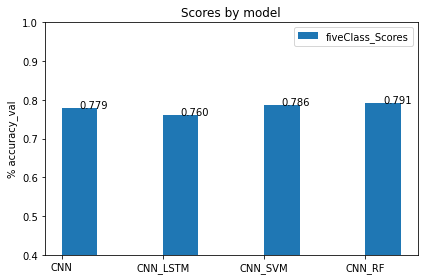

In [ ]:
labels = ['CNN', 'CNN_LSTM', 'CNN_SVM', 'CNN_RF']
#twoClasss_Scores = [0.8713,0.8652,0.8704,0.8704]
fiveClass_Scores = [0.779, 0.760, 0.786, 0.791]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, fiveClass_Scores, width, label='fiveClass_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

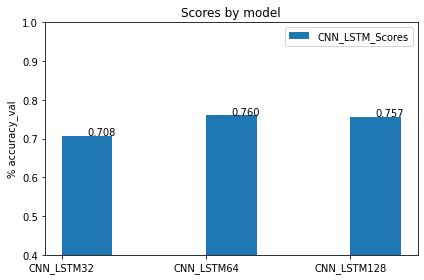

In [ ]:
labels = ['CNN_LSTM32', 'CNN_LSTM64', 'CNN_LSTM128']
#twoClasss_Scores = [0.8713,0.8652,0.8704,0.8704]
CNN_LSTM_Scores = [0.708,0.760, 0.757]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, CNN_LSTM_Scores, width, label='CNN_LSTM_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#CNN_LSTM 32

32 neurones

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(32,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 7s 530ms/step - loss: 1.7608 - accuracy: 0.1870 - val_loss: 1.5811 - val_accuracy: 0.2443
Epoch 2/50
8/8 [==============================] - 3s 386ms/step - loss: 1.5366 - accuracy: 0.3062 - val_loss: 1.3822 - val_accuracy: 0.3591
Epoch 3/50
8/8 [==============================] - 3s 391ms/step - loss: 1.3709 - accuracy: 0.3687 - val_loss: 1.2460 - val_accuracy: 0.4078
Epoch 4/50
8/8 [==============================] - 3s 388ms/step - loss: 1.2299 - accuracy: 0.4371 - val_loss: 1.1391 - val_accuracy: 0.4722
Epoch 5/50
8/8 [==============================] - 3s 389ms/step - loss: 1.1513 - accuracy: 0.4576 - val_loss: 1.2047 - val_accuracy: 0.4070
Epoch 6/50
8/8 [==============================] - 3s 389ms/step - loss: 1.1669 - accuracy: 0.4391 - val_loss: 1.1289 - val_accuracy: 0.4278
Epoch 7/50
8/8 [==============================] - 3s 390ms/step - loss: 1.1208 - accuracy: 0.4649 - val_loss: 1.0753 - val_accuracy: 0.5165
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5772236585617065
accuracy =  0.7344927787780762


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.6282267570495605
accuracy =  0.708695650100708


128 neurones

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(128,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(128,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 605ms/step - loss: 1.7151 - accuracy: 0.1961 - val_loss: 1.5035 - val_accuracy: 0.2687
Epoch 2/50
8/8 [==============================] - 4s 462ms/step - loss: 1.4882 - accuracy: 0.3256 - val_loss: 1.3429 - val_accuracy: 0.3835
Epoch 3/50
8/8 [==============================] - 4s 463ms/step - loss: 1.2573 - accuracy: 0.4214 - val_loss: 1.1410 - val_accuracy: 0.4852
Epoch 4/50
8/8 [==============================] - 4s 465ms/step - loss: 1.1462 - accuracy: 0.4828 - val_loss: 1.1091 - val_accuracy: 0.4617
Epoch 5/50
8/8 [==============================] - 4s 465ms/step - loss: 1.0882 - accuracy: 0.5008 - val_loss: 1.0210 - val_accuracy: 0.5400
Epoch 6/50
8/8 [==============================] - 4s 468ms/step - loss: 1.0097 - accuracy: 0.5491 - val_loss: 1.0032 - val_accuracy: 0.5504
Epoch 7/50
8/8 [==============================] - 4s 469ms/step - loss: 1.0128 - accuracy: 0.5360 - val_loss: 0.9779 - val_accuracy: 0.5513
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.49366116523742676
accuracy =  0.765313982963562


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5408706068992615
accuracy =  0.7573913335800171
